In [1]:
import pandas as pd
S2F = pd.read_csv('BTC-S2F.csv')
NVT = pd.read_csv('BTC-NVT.csv')
MVRV = pd.read_csv('BTC-MVRV.csv')
print(S2F.shape)
print(NVT.shape)
print(MVRV.shape)

(3982, 6)
(3875, 5)
(3981, 5)


In [2]:
print(S2F.columns)

Index(['时间', '币价', 'S2F(月)', 'S2F(年)', '预期价格(月)', '预期价格(年)'], dtype='object')


In [3]:
print(NVT.columns)

Index(['时间', '币价', 'NVT', 'NVTS', 'SMA60'], dtype='object')


In [4]:
print(MVRV.columns)

Index(['时间', '币价', 'MVRV', '辅助线', 'SMA60'], dtype='object')


In [5]:
print(S2F.head())
print(NVT.head())
print(MVRV.head())

               时间      币价    S2F(月)    S2F(年)   预期价格(月)   预期价格(年)
0  2010/8/16 0:00  0.0655  0.759903  1.025398  0.175523  0.195532
1  2010/8/17 0:00  0.0700  0.767184  1.025663  0.180617  0.195698
2  2010/8/18 0:00  0.0680  0.774364  1.025790  0.185736  0.195779
3  2010/8/19 0:00  0.0667  0.782338  1.026069  0.191533  0.195954
4  2010/8/20 0:00  0.0655  0.786949  1.026394  0.194939  0.196159
               时间      币价       NVT       NVTS  SMA60
0  2010/12/1 0:00  0.2275   73.6973  undefined    NaN
1  2010/12/2 0:00  0.2550   67.3531  undefined    NaN
2  2010/12/3 0:00  0.2511  128.7577  undefined    NaN
3  2010/12/4 0:00  0.2050   62.3520  undefined    NaN
4  2010/12/5 0:00  0.1900  143.5623  undefined    NaN
               时间      币价      MVRV  辅助线  SMA60
0  2010/8/16 0:00  0.0655  7.138375    1    NaN
1  2010/8/17 0:00  0.0700  7.509859    1    NaN
2  2010/8/18 0:00  0.0680  7.147964    1    NaN
3  2010/8/19 0:00  0.0667  6.931684    1    NaN
4  2010/8/20 0:00  0.0655  6.694129    1

In [6]:
print(S2F.head(3))
print(S2F.tail(3))

               时间      币价    S2F(月)    S2F(年)   预期价格(月)   预期价格(年)
0  2010/8/16 0:00  0.0655  0.759903  1.025398  0.175523  0.195532
1  2010/8/17 0:00  0.0700  0.767184  1.025663  0.180617  0.195698
2  2010/8/18 0:00  0.0680  0.774364  1.025790  0.185736  0.195779
                  时间           币价     S2F(月)     S2F(年)      预期价格(月)  \
3979   2021/7/8 0:00  32930.19737  70.588537  54.771967  140689.7735   
3980   2021/7/9 0:00  33641.50878  70.486683  54.809374  140081.6368   
3981  2021/7/10 0:00  33892.21184  69.599441  54.812481  134858.1623   

          预期价格(年)  
3979  98291.28871  
3980  98512.98463  
3981  98531.41324  


In [7]:
MVRV.to_excel('MVRV.xlsx')
print('Done!')

Done!


In [8]:
MVRV.iloc[869:3982,0]

869     2013/1/1 0:00
870     2013/1/2 0:00
871     2013/1/3 0:00
872     2013/1/4 0:00
873     2013/1/5 0:00
            ...      
3976    2021/7/5 0:00
3977    2021/7/6 0:00
3978    2021/7/7 0:00
3979    2021/7/8 0:00
3980    2021/7/9 0:00
Name: 时间, Length: 3112, dtype: object

In [9]:
NVT.iloc[762:3875,0]

762      2013/1/1 0:00
763      2013/1/2 0:00
764      2013/1/3 0:00
765      2013/1/4 0:00
766      2013/1/5 0:00
             ...      
3870     2021/7/6 0:00
3871     2021/7/7 0:00
3872     2021/7/8 0:00
3873     2021/7/9 0:00
3874    2021/7/10 0:00
Name: 时间, Length: 3113, dtype: object

In [10]:
S2F.iloc[869:3982,0]

869      2013/1/1 0:00
870      2013/1/2 0:00
871      2013/1/3 0:00
872      2013/1/4 0:00
873      2013/1/5 0:00
             ...      
3977     2021/7/6 0:00
3978     2021/7/7 0:00
3979     2021/7/8 0:00
3980     2021/7/9 0:00
3981    2021/7/10 0:00
Name: 时间, Length: 3113, dtype: object

---

# S2F数据处理

---

In [11]:
def get_s2f(s2f_month_predict,price):
   get_s2f=s2f_month_predict/price
   return get_s2f

def wrapper_s2f_1(row):
    return get_s2f(row['预期价格(月)'],row['币价'])

S2F['月预期价格/币价'] = S2F.apply(wrapper_s2f_1,axis=1)

S2F

,时间,币价,S2F(月),S2F(年),预期价格(月),预期价格(年),月预期价格/币价
0,2010/8/16 0:00,0.06550,0.759903,1.025398,0.175523,0.195532,2.679740
1,2010/8/17 0:00,0.07000,0.767184,1.025663,0.180617,0.195698,2.580243
2,2010/8/18 0:00,0.06800,0.774364,1.025790,0.185736,0.195779,2.731412
3,2010/8/19 0:00,0.06670,0.782338,1.026069,0.191533,0.195954,2.871559
4,2010/8/20 0:00,0.06550,0.786949,1.026394,0.194939,0.196159,2.976168
...,...,...,...,...,...,...,...
3977,2021/7/6 0:00,34072.49608,70.163513,54.714158,138163.706200,97949.354870,4.054992
3978,2021/7/7 0:00,34536.09049,70.375195,54.756615,139417.992200,98200.402840,4.036878
3979,2021/7/8 0:00,32930.19737,70.588537,54.771967,140689.773500,98291.288710,4.272364
3980,2021/7/9 0:00,33641.50878,70.486683,54.809374,140081.636800,98512.984630,4.163952


In [12]:
from scipy import stats

get_s2f_gmean = stats.gmean(S2F['月预期价格/币价'].iloc[869:3980], axis=0, dtype=None)
get_s2f_gmean

1.2339568519781872

In [13]:
import math

def get_s2f_gmean_ln_process(get_s2f):
   get_s2f_glp = math.log(get_s2f/get_s2f_gmean)
   return get_s2f_glp

def wrapper_s2f_2(row):
    return get_s2f_gmean_ln_process(row['月预期价格/币价'])

S2F['月预期价格/币价的gl处理1'] = S2F.apply(wrapper_s2f_2,axis=1)

S2F

,时间,币价,S2F(月),S2F(年),预期价格(月),预期价格(年),月预期价格/币价,月预期价格/币价的gl处理1
0,2010/8/16 0:00,0.06550,0.759903,1.025398,0.175523,0.195532,2.679740,0.775494
1,2010/8/17 0:00,0.07000,0.767184,1.025663,0.180617,0.195698,2.580243,0.737658
2,2010/8/18 0:00,0.06800,0.774364,1.025790,0.185736,0.195779,2.731412,0.794593
3,2010/8/19 0:00,0.06670,0.782338,1.026069,0.191533,0.195954,2.871559,0.844629
4,2010/8/20 0:00,0.06550,0.786949,1.026394,0.194939,0.196159,2.976168,0.880411
...,...,...,...,...,...,...,...,...
3977,2021/7/6 0:00,34072.49608,70.163513,54.714158,138163.706200,97949.354870,4.054992,1.189723
3978,2021/7/7 0:00,34536.09049,70.375195,54.756615,139417.992200,98200.402840,4.036878,1.185246
3979,2021/7/8 0:00,32930.19737,70.588537,54.771967,140689.773500,98291.288710,4.272364,1.241941
3980,2021/7/9 0:00,33641.50878,70.486683,54.809374,140081.636800,98512.984630,4.163952,1.216239


In [14]:
import numpy as np
get_s2f_glp_mean = np.mean(S2F['月预期价格/币价的gl处理1'].iloc[869:3980], axis=0, dtype=None)
get_s2f_glp_mean

1.8271751482098364e-17

In [15]:
get_s2f_glp_std = np.std(S2F['月预期价格/币价的gl处理1'].iloc[869:3980], ddof=1, axis=0, dtype=None)
get_s2f_glp_std

0.8940335543917982

In [16]:
def get_s2f_mean_std_process(get_s2f_glp):
   get_s2f_msp = (get_s2f_glp-get_s2f_glp_mean)/(2*get_s2f_glp_std)
   return get_s2f_msp

def wrapper_s2f_3(row):
    return get_s2f_mean_std_process(row['月预期价格/币价的gl处理1'])

S2F['月预期价格/币价的ms处理2'] = S2F.apply(wrapper_s2f_3,axis=1)

S2F

,时间,币价,S2F(月),S2F(年),预期价格(月),预期价格(年),月预期价格/币价,月预期价格/币价的gl处理1,月预期价格/币价的ms处理2
0,2010/8/16 0:00,0.06550,0.759903,1.025398,0.175523,0.195532,2.679740,0.775494,0.433705
1,2010/8/17 0:00,0.07000,0.767184,1.025663,0.180617,0.195698,2.580243,0.737658,0.412545
2,2010/8/18 0:00,0.06800,0.774364,1.025790,0.185736,0.195779,2.731412,0.794593,0.444386
3,2010/8/19 0:00,0.06670,0.782338,1.026069,0.191533,0.195954,2.871559,0.844629,0.472370
4,2010/8/20 0:00,0.06550,0.786949,1.026394,0.194939,0.196159,2.976168,0.880411,0.492381
...,...,...,...,...,...,...,...,...,...
3977,2021/7/6 0:00,34072.49608,70.163513,54.714158,138163.706200,97949.354870,4.054992,1.189723,0.665368
3978,2021/7/7 0:00,34536.09049,70.375195,54.756615,139417.992200,98200.402840,4.036878,1.185246,0.662864
3979,2021/7/8 0:00,32930.19737,70.588537,54.771967,140689.773500,98291.288710,4.272364,1.241941,0.694572
3980,2021/7/9 0:00,33641.50878,70.486683,54.809374,140081.636800,98512.984630,4.163952,1.216239,0.680197


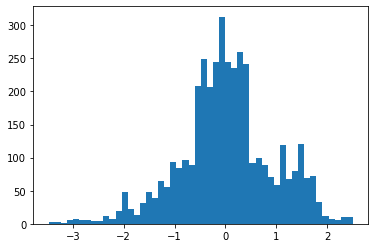

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


data = S2F['月预期价格/币价的gl处理1']

plt.hist(data, bins=50)

plt.show()

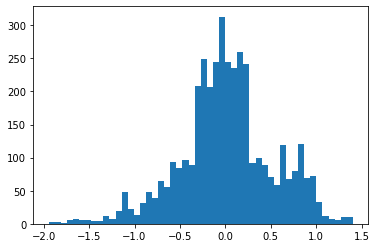

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


data = S2F['月预期价格/币价的ms处理2']

plt.hist(data, bins=50)

plt.show()

---

# MVRV数据处理

---

In [19]:
mvrv_gmean = stats.gmean(MVRV['SMA60'].iloc[869:3980], axis=0, dtype=None)
mvrv_gmean

1.692502743575846

In [20]:
def mvrv_gmean_ln_process(mvrv):
   mvrv_glp = math.log(mvrv/mvrv_gmean)
   return mvrv_glp

def wrapper_mvrv_1(row):
    return mvrv_gmean_ln_process(row['SMA60'])

MVRV['MVRV的gl处理1'] = MVRV.apply(wrapper_mvrv_1,axis=1)

MVRV

,时间,币价,MVRV,辅助线,SMA60,MVRV的gl处理1
0,2010/8/16 0:00,0.06550,7.138375,1,NaN,NaN
1,2010/8/17 0:00,0.07000,7.509859,1,NaN,NaN
2,2010/8/18 0:00,0.06800,7.147964,1,NaN,NaN
3,2010/8/19 0:00,0.06670,6.931684,1,NaN,NaN
4,2010/8/20 0:00,0.06550,6.694129,1,NaN,NaN
...,...,...,...,...,...,...
3976,2021/7/5 0:00,33644.91484,1.752492,1,1.978777,0.156271
3977,2021/7/6 0:00,34072.49608,1.763786,1,1.960355,0.146917
3978,2021/7/7 0:00,34536.09049,1.753797,1,1.940687,0.136834
3979,2021/7/8 0:00,32930.19737,1.697990,1,1.920575,0.126416


In [21]:
mvrv_glp_mean = np.mean(MVRV['MVRV的gl处理1'].iloc[869:3980], axis=0, dtype=None)
mvrv_glp_mean

3.654350296419673e-17

In [22]:
mvrv_glp_std = np.std(MVRV['MVRV的gl处理1'].iloc[869:3980], ddof=1, axis=0, dtype=None)
mvrv_glp_std

0.40589704262806914

In [23]:
def mvrv_mean_std_process(mvrv_glp):
   mvrv_msp = (mvrv_glp-mvrv_glp_mean)/(2*mvrv_glp_std)
   return mvrv_msp

def wrapper_mvrv_2(row):
    return mvrv_mean_std_process(row['MVRV的gl处理1'])

MVRV['MVRV的ms处理2'] = MVRV.apply(wrapper_mvrv_2,axis=1)

MVRV

,时间,币价,MVRV,辅助线,SMA60,MVRV的gl处理1,MVRV的ms处理2
0,2010/8/16 0:00,0.06550,7.138375,1,NaN,NaN,NaN
1,2010/8/17 0:00,0.07000,7.509859,1,NaN,NaN,NaN
2,2010/8/18 0:00,0.06800,7.147964,1,NaN,NaN,NaN
3,2010/8/19 0:00,0.06670,6.931684,1,NaN,NaN,NaN
4,2010/8/20 0:00,0.06550,6.694129,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3976,2021/7/5 0:00,33644.91484,1.752492,1,1.978777,0.156271,0.192501
3977,2021/7/6 0:00,34072.49608,1.763786,1,1.960355,0.146917,0.180979
3978,2021/7/7 0:00,34536.09049,1.753797,1,1.940687,0.136834,0.168557
3979,2021/7/8 0:00,32930.19737,1.697990,1,1.920575,0.126416,0.155724


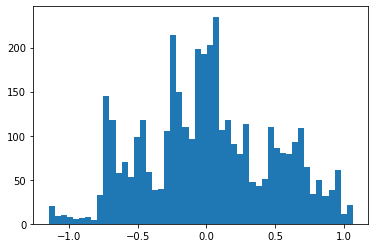

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


data = MVRV['MVRV的gl处理1']

plt.hist(data, bins=50)

plt.show()

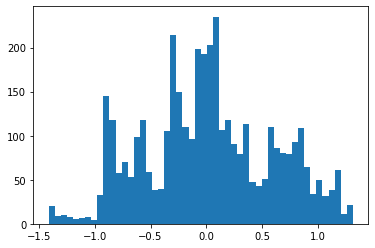

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


data = MVRV['MVRV的ms处理2']

plt.hist(data, bins=50)

plt.show()

---

# NVT数据处理

---

In [26]:
NVT

,时间,币价,NVT,NVTS,SMA60
0,2010/12/1 0:00,0.22750,73.6973,undefined,NaN
1,2010/12/2 0:00,0.25500,67.3531,undefined,NaN
2,2010/12/3 0:00,0.25110,128.7577,undefined,NaN
3,2010/12/4 0:00,0.20500,62.3520,undefined,NaN
4,2010/12/5 0:00,0.19000,143.5623,undefined,NaN
...,...,...,...,...,...
3870,2021/7/6 0:00,34072.49608,14.0748,8.1071,11.937767
3871,2021/7/7 0:00,34536.09049,14.1515,8.2656,11.947130
3872,2021/7/8 0:00,32930.19737,5.7685,7.8656,11.756197
3873,2021/7/9 0:00,33641.50878,5.4753,8.0105,11.626820


In [27]:
nvt_gmean = stats.gmean(NVT['SMA60'].iloc[762:3980], axis=0, dtype=None)
nvt_gmean

12.321102696154687

In [28]:
def nvt_gmean_ln_process(nvt):
   nvt_glp = math.log(nvt/nvt_gmean)
   return nvt_glp

def wrapper_nvt_1(row):
    return nvt_gmean_ln_process(row['SMA60'])

NVT['NVT的gl处理1'] = NVT.apply(wrapper_nvt_1,axis=1)

NVT

,时间,币价,NVT,NVTS,SMA60,NVT的gl处理1
0,2010/12/1 0:00,0.22750,73.6973,undefined,NaN,NaN
1,2010/12/2 0:00,0.25500,67.3531,undefined,NaN,NaN
2,2010/12/3 0:00,0.25110,128.7577,undefined,NaN,NaN
3,2010/12/4 0:00,0.20500,62.3520,undefined,NaN,NaN
4,2010/12/5 0:00,0.19000,143.5623,undefined,NaN,NaN
...,...,...,...,...,...,...
3870,2021/7/6 0:00,34072.49608,14.0748,8.1071,11.937767,-0.031606
3871,2021/7/7 0:00,34536.09049,14.1515,8.2656,11.947130,-0.030822
3872,2021/7/8 0:00,32930.19737,5.7685,7.8656,11.756197,-0.046933
3873,2021/7/9 0:00,33641.50878,5.4753,8.0105,11.626820,-0.057999


In [29]:
nvt_glp_mean = np.mean(NVT['NVT的gl处理1'].iloc[762:3980], axis=0, dtype=None)
nvt_glp_mean

9.130006241697401e-18

In [30]:
nvt_glp_std = np.std(NVT['NVT的gl处理1'].iloc[762:3980], ddof=1, axis=0, dtype=None)
nvt_glp_std

0.43172794777526535

In [31]:
def nvt_mean_std_process(nvt_glp):
   nvt_msp = (nvt_glp-nvt_glp_mean)/(2*nvt_glp_std)
   return nvt_msp

def wrapper_nvt_2(row):
    return nvt_mean_std_process(row['NVT的gl处理1'])

NVT['NVT的ms处理2'] = NVT.apply(wrapper_nvt_2,axis=1)

NVT

,时间,币价,NVT,NVTS,SMA60,NVT的gl处理1,NVT的ms处理2
0,2010/12/1 0:00,0.22750,73.6973,undefined,NaN,NaN,NaN
1,2010/12/2 0:00,0.25500,67.3531,undefined,NaN,NaN,NaN
2,2010/12/3 0:00,0.25110,128.7577,undefined,NaN,NaN,NaN
3,2010/12/4 0:00,0.20500,62.3520,undefined,NaN,NaN,NaN
4,2010/12/5 0:00,0.19000,143.5623,undefined,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3870,2021/7/6 0:00,34072.49608,14.0748,8.1071,11.937767,-0.031606,-0.036605
3871,2021/7/7 0:00,34536.09049,14.1515,8.2656,11.947130,-0.030822,-0.035697
3872,2021/7/8 0:00,32930.19737,5.7685,7.8656,11.756197,-0.046933,-0.054355
3873,2021/7/9 0:00,33641.50878,5.4753,8.0105,11.626820,-0.057999,-0.067171


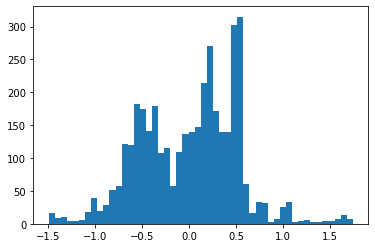

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


data = NVT['NVT的gl处理1']

plt.hist(data, bins=50)

plt.show()

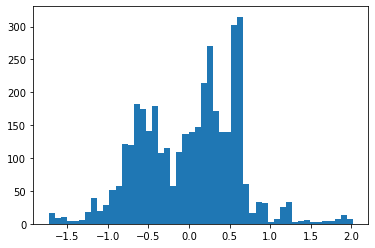

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


data = NVT['NVT的ms处理2']

plt.hist(data, bins=50)

plt.show()

---

# 绘制三维图

---

In [34]:
MVRV.iloc[:,[0,6]]

,时间,MVRV的ms处理2
0,2010/8/16 0:00,NaN
1,2010/8/17 0:00,NaN
2,2010/8/18 0:00,NaN
3,2010/8/19 0:00,NaN
4,2010/8/20 0:00,NaN
...,...,...
3976,2021/7/5 0:00,0.192501
3977,2021/7/6 0:00,0.180979
3978,2021/7/7 0:00,0.168557
3979,2021/7/8 0:00,0.155724


In [35]:
S2F.iloc[:,[0,8]]

,时间,月预期价格/币价的ms处理2
0,2010/8/16 0:00,0.433705
1,2010/8/17 0:00,0.412545
2,2010/8/18 0:00,0.444386
3,2010/8/19 0:00,0.472370
4,2010/8/20 0:00,0.492381
...,...,...
3977,2021/7/6 0:00,0.665368
3978,2021/7/7 0:00,0.662864
3979,2021/7/8 0:00,0.694572
3980,2021/7/9 0:00,0.680197


In [36]:
NVT.iloc[:,[0,6]]

,时间,NVT的ms处理2
0,2010/12/1 0:00,NaN
1,2010/12/2 0:00,NaN
2,2010/12/3 0:00,NaN
3,2010/12/4 0:00,NaN
4,2010/12/5 0:00,NaN
...,...,...
3870,2021/7/6 0:00,-0.036605
3871,2021/7/7 0:00,-0.035697
3872,2021/7/8 0:00,-0.054355
3873,2021/7/9 0:00,-0.067171


In [37]:
MVRV_1 = MVRV.iloc[869:3981,[0,6]].reset_index(drop=True)
S2F_1 = S2F.iloc[869:3981,[0,8]].reset_index(drop=True)
NVT_1 = NVT.iloc[762:3874,[0,6]].reset_index(drop=True)
MVRV_1 , S2F_1 , NVT_1

(                 时间  MVRV的ms处理2
 0     2013/1/1 0:00    0.036902
 1     2013/1/2 0:00    0.039324
 2     2013/1/3 0:00    0.041663
 3     2013/1/4 0:00    0.044175
 4     2013/1/5 0:00    0.046475
 ...             ...         ...
 3107  2021/7/5 0:00    0.192501
 3108  2021/7/6 0:00    0.180979
 3109  2021/7/7 0:00    0.168557
 3110  2021/7/8 0:00    0.155724
 3111  2021/7/9 0:00    0.144686
 
 [3112 rows x 2 columns],
                  时间  月预期价格/币价的ms处理2
 0     2013/1/1 0:00        1.387533
 1     2013/1/2 0:00        1.386740
 2     2013/1/3 0:00        1.362022
 3     2013/1/4 0:00        1.345869
 4     2013/1/5 0:00        1.347358
 ...             ...             ...
 3107  2021/7/5 0:00        0.668372
 3108  2021/7/6 0:00        0.665368
 3109  2021/7/7 0:00        0.662864
 3110  2021/7/8 0:00        0.694572
 3111  2021/7/9 0:00        0.680197
 
 [3112 rows x 2 columns],
                  时间  NVT的ms处理2
 0     2013/1/1 0:00  -0.390973
 1     2013/1/2 0:00  -0.390840
 2     2

In [38]:
#链接三列
all = pd.concat([MVRV_1,S2F_1,NVT_1],axis=1,join='inner')

# 将时间调为第一列
time = all.pop('时间').iloc[:,0]
all.insert(0,'时间',time) 

# 填充空值
all = all.fillna(value=0)

#将时间设为索引
all['时间'] = pd.to_datetime(all['时间'])
all.set_index("时间", inplace=True)
all.index.name='Time' 

#打印
all.columns=['MVRV','S2F','NVT']
all

,MVRV,S2F,NVT
Time,,,
2013-01-01,0.036902,1.387533,-0.390973
2013-01-02,0.039324,1.386740,-0.390840
2013-01-03,0.041663,1.362022,-0.387539
2013-01-04,0.044175,1.345869,-0.387369
2013-01-05,0.046475,1.347358,-0.388225
...,...,...,...
2021-07-05,0.192501,0.668372,-0.043794
2021-07-06,0.180979,0.665368,-0.036605
2021-07-07,0.168557,0.662864,-0.035697


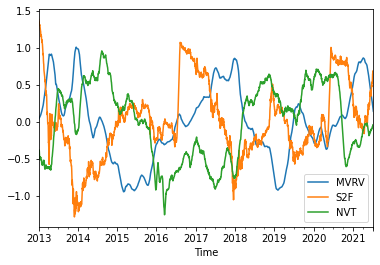

In [39]:
all.plot()
plt.show()

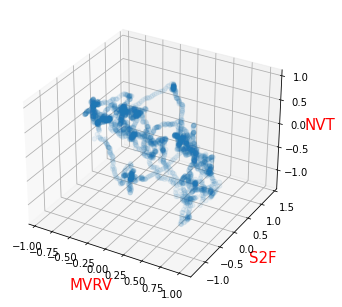

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

all_array = np.array(all)
x = all_array[:,0]  # MVRV
y = all_array[:,1]  # S2F
z = all_array[:,2]  # NVT
 
 
# 绘制散点图
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z,alpha=0.07)
 
 
# 添加坐标轴(顺序是Z, Y, X)
ax.set_zlabel('NVT', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('S2F', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('MVRV', fontdict={'size': 15, 'color': 'red'})
plt.show()

In [41]:
MVRV.insert(7,column='price_increase',value=0.0)
MVRV

,时间,币价,MVRV,辅助线,SMA60,MVRV的gl处理1,MVRV的ms处理2,price_increase
0,2010/8/16 0:00,0.06550,7.138375,1,NaN,NaN,NaN,0.0
1,2010/8/17 0:00,0.07000,7.509859,1,NaN,NaN,NaN,0.0
2,2010/8/18 0:00,0.06800,7.147964,1,NaN,NaN,NaN,0.0
3,2010/8/19 0:00,0.06670,6.931684,1,NaN,NaN,NaN,0.0
4,2010/8/20 0:00,0.06550,6.694129,1,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
3976,2021/7/5 0:00,33644.91484,1.752492,1,1.978777,0.156271,0.192501,0.0
3977,2021/7/6 0:00,34072.49608,1.763786,1,1.960355,0.146917,0.180979,0.0
3978,2021/7/7 0:00,34536.09049,1.753797,1,1.940687,0.136834,0.168557,0.0
3979,2021/7/8 0:00,32930.19737,1.697990,1,1.920575,0.126416,0.155724,0.0


In [42]:
MVRV['price_increase'] = (MVRV['币价'].shift(-60) - MVRV['币价']) / MVRV['币价']
MVRV

,时间,币价,MVRV,辅助线,SMA60,MVRV的gl处理1,MVRV的ms处理2,price_increase
0,2010/8/16 0:00,0.06550,7.138375,1,NaN,NaN,NaN,0.603053
1,2010/8/17 0:00,0.07000,7.509859,1,NaN,NaN,NaN,0.442857
2,2010/8/18 0:00,0.06800,7.147964,1,NaN,NaN,NaN,0.500000
3,2010/8/19 0:00,0.06670,6.931684,1,NaN,NaN,NaN,0.535232
4,2010/8/20 0:00,0.06550,6.694129,1,NaN,NaN,NaN,0.480916
...,...,...,...,...,...,...,...,...
3976,2021/7/5 0:00,33644.91484,1.752492,1,1.978777,0.156271,0.192501,NaN
3977,2021/7/6 0:00,34072.49608,1.763786,1,1.960355,0.146917,0.180979,NaN
3978,2021/7/7 0:00,34536.09049,1.753797,1,1.940687,0.136834,0.168557,NaN
3979,2021/7/8 0:00,32930.19737,1.697990,1,1.920575,0.126416,0.155724,NaN


In [43]:
def price_increase_2(price_increase):
   price_increase_2 = math.log(price_increase+1)
   return price_increase_2

def wrapper_price_increase_2(row):
    return price_increase_2(row['price_increase'])

MVRV['price_increase_2'] = MVRV.apply(wrapper_price_increase_2,axis=1)

MVRV

,时间,币价,MVRV,辅助线,SMA60,MVRV的gl处理1,MVRV的ms处理2,price_increase,price_increase_2
0,2010/8/16 0:00,0.06550,7.138375,1,NaN,NaN,NaN,0.603053,0.471910
1,2010/8/17 0:00,0.07000,7.509859,1,NaN,NaN,NaN,0.442857,0.366625
2,2010/8/18 0:00,0.06800,7.147964,1,NaN,NaN,NaN,0.500000,0.405465
3,2010/8/19 0:00,0.06670,6.931684,1,NaN,NaN,NaN,0.535232,0.428682
4,2010/8/20 0:00,0.06550,6.694129,1,NaN,NaN,NaN,0.480916,0.392661
...,...,...,...,...,...,...,...,...,...
3976,2021/7/5 0:00,33644.91484,1.752492,1,1.978777,0.156271,0.192501,NaN,NaN
3977,2021/7/6 0:00,34072.49608,1.763786,1,1.960355,0.146917,0.180979,NaN,NaN
3978,2021/7/7 0:00,34536.09049,1.753797,1,1.940687,0.136834,0.168557,NaN,NaN
3979,2021/7/8 0:00,32930.19737,1.697990,1,1.920575,0.126416,0.155724,NaN,NaN


In [44]:
MVRV.insert(9,column='std/price',value=0.0)
MVRV

,时间,币价,MVRV,辅助线,SMA60,MVRV的gl处理1,MVRV的ms处理2,price_increase,price_increase_2,std/price
0,2010/8/16 0:00,0.06550,7.138375,1,NaN,NaN,NaN,0.603053,0.471910,0.0
1,2010/8/17 0:00,0.07000,7.509859,1,NaN,NaN,NaN,0.442857,0.366625,0.0
2,2010/8/18 0:00,0.06800,7.147964,1,NaN,NaN,NaN,0.500000,0.405465,0.0
3,2010/8/19 0:00,0.06670,6.931684,1,NaN,NaN,NaN,0.535232,0.428682,0.0
4,2010/8/20 0:00,0.06550,6.694129,1,NaN,NaN,NaN,0.480916,0.392661,0.0
...,...,...,...,...,...,...,...,...,...,...
3976,2021/7/5 0:00,33644.91484,1.752492,1,1.978777,0.156271,0.192501,NaN,NaN,0.0
3977,2021/7/6 0:00,34072.49608,1.763786,1,1.960355,0.146917,0.180979,NaN,NaN,0.0
3978,2021/7/7 0:00,34536.09049,1.753797,1,1.940687,0.136834,0.168557,NaN,NaN,0.0
3979,2021/7/8 0:00,32930.19737,1.697990,1,1.920575,0.126416,0.155724,NaN,NaN,0.0


In [45]:
MVRV['std/price'] = MVRV['币价'].shift(-60).rolling(window=60).std()/MVRV['币价']
MVRV[60:3920]

,时间,币价,MVRV,辅助线,SMA60,MVRV的gl处理1,MVRV的ms处理2,price_increase,price_increase_2,std/price
60,2010/10/15 0:00,0.10500,4.343539,1,4.774018,1.036980,1.277393,1.349524,0.854213,0.614015
61,2010/10/16 0:00,0.10100,4.069854,1,4.716685,1.024898,1.262510,1.356436,0.857150,0.620447
62,2010/10/17 0:00,0.10200,4.062779,1,4.665265,1.013936,1.249007,1.450980,0.896488,0.596310
63,2010/10/18 0:00,0.10240,4.029949,1,4.616903,1.003516,1.236170,1.343750,0.851752,0.573982
64,2010/10/19 0:00,0.09700,3.807617,1,4.568794,0.993041,1.223267,1.484536,0.910086,0.580998
...,...,...,...,...,...,...,...,...,...,...
3915,2021/5/5 0:00,57515.84824,2.900680,1,3.196409,0.635820,0.783228,-0.382032,-0.481318,0.132002
3916,2021/5/6 0:00,57100.39926,2.845644,1,3.188745,0.633419,0.780271,-0.410776,-0.528949,0.127403
3917,2021/5/7 0:00,57465.15573,2.869115,1,3.180730,0.630902,0.777170,-0.407076,-0.522688,0.120051
3918,2021/5/8 0:00,57597.64189,2.933892,1,3.171319,0.627939,0.773520,-0.400391,-0.511477,0.112252


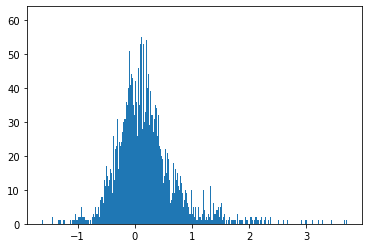

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


data = MVRV['price_increase_2']

plt.hist(data, bins=500)

plt.show()

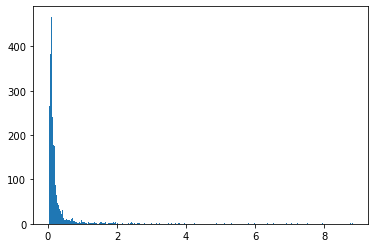

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


data = MVRV['std/price']

plt.hist(data, bins=500)

plt.show()

In [48]:
MVRV_2 = MVRV.iloc[869:3981,[0,8,9]].reset_index(drop=True)
MVRV_2

,时间,price_increase_2,std/price
0,2013/1/1 0:00,0.945614,0.488573
1,2013/1/2 0:00,0.954700,0.500061
2,2013/1/3 0:00,0.992634,0.508880
3,2013/1/4 0:00,1.094406,0.528297
4,2013/1/5 0:00,1.115827,0.553003
...,...,...,...
3107,2021/7/5 0:00,NaN,NaN
3108,2021/7/6 0:00,NaN,NaN
3109,2021/7/7 0:00,NaN,NaN
3110,2021/7/8 0:00,NaN,NaN


In [49]:
#链接三列
all_2 = pd.concat([MVRV_1,S2F_1,NVT_1,MVRV_2],axis=1,join='inner')

# 将时间调为第一列
time = all_2.pop('时间').iloc[:,0]
all_2.insert(0,'时间',time) 

# 填充空值
all_2 = all_2.fillna(value=0)

#将时间设为索引
all_2['时间'] = pd.to_datetime(all_2['时间'])
all_2.set_index("时间", inplace=True)
all_2.index.name='Time' 

#打印
all_2.columns=['MVRV','S2F','NVT','price_increase_2','std/price']
all_2

,MVRV,S2F,NVT,price_increase_2,std/price
Time,,,,,
2013-01-01,0.036902,1.387533,-0.390973,0.945614,0.488573
2013-01-02,0.039324,1.386740,-0.390840,0.954700,0.500061
2013-01-03,0.041663,1.362022,-0.387539,0.992634,0.508880
2013-01-04,0.044175,1.345869,-0.387369,1.094406,0.528297
2013-01-05,0.046475,1.347358,-0.388225,1.115827,0.553003
...,...,...,...,...,...
2021-07-05,0.192501,0.668372,-0.043794,0.000000,0.000000
2021-07-06,0.180979,0.665368,-0.036605,0.000000,0.000000
2021-07-07,0.168557,0.662864,-0.035697,0.000000,0.000000


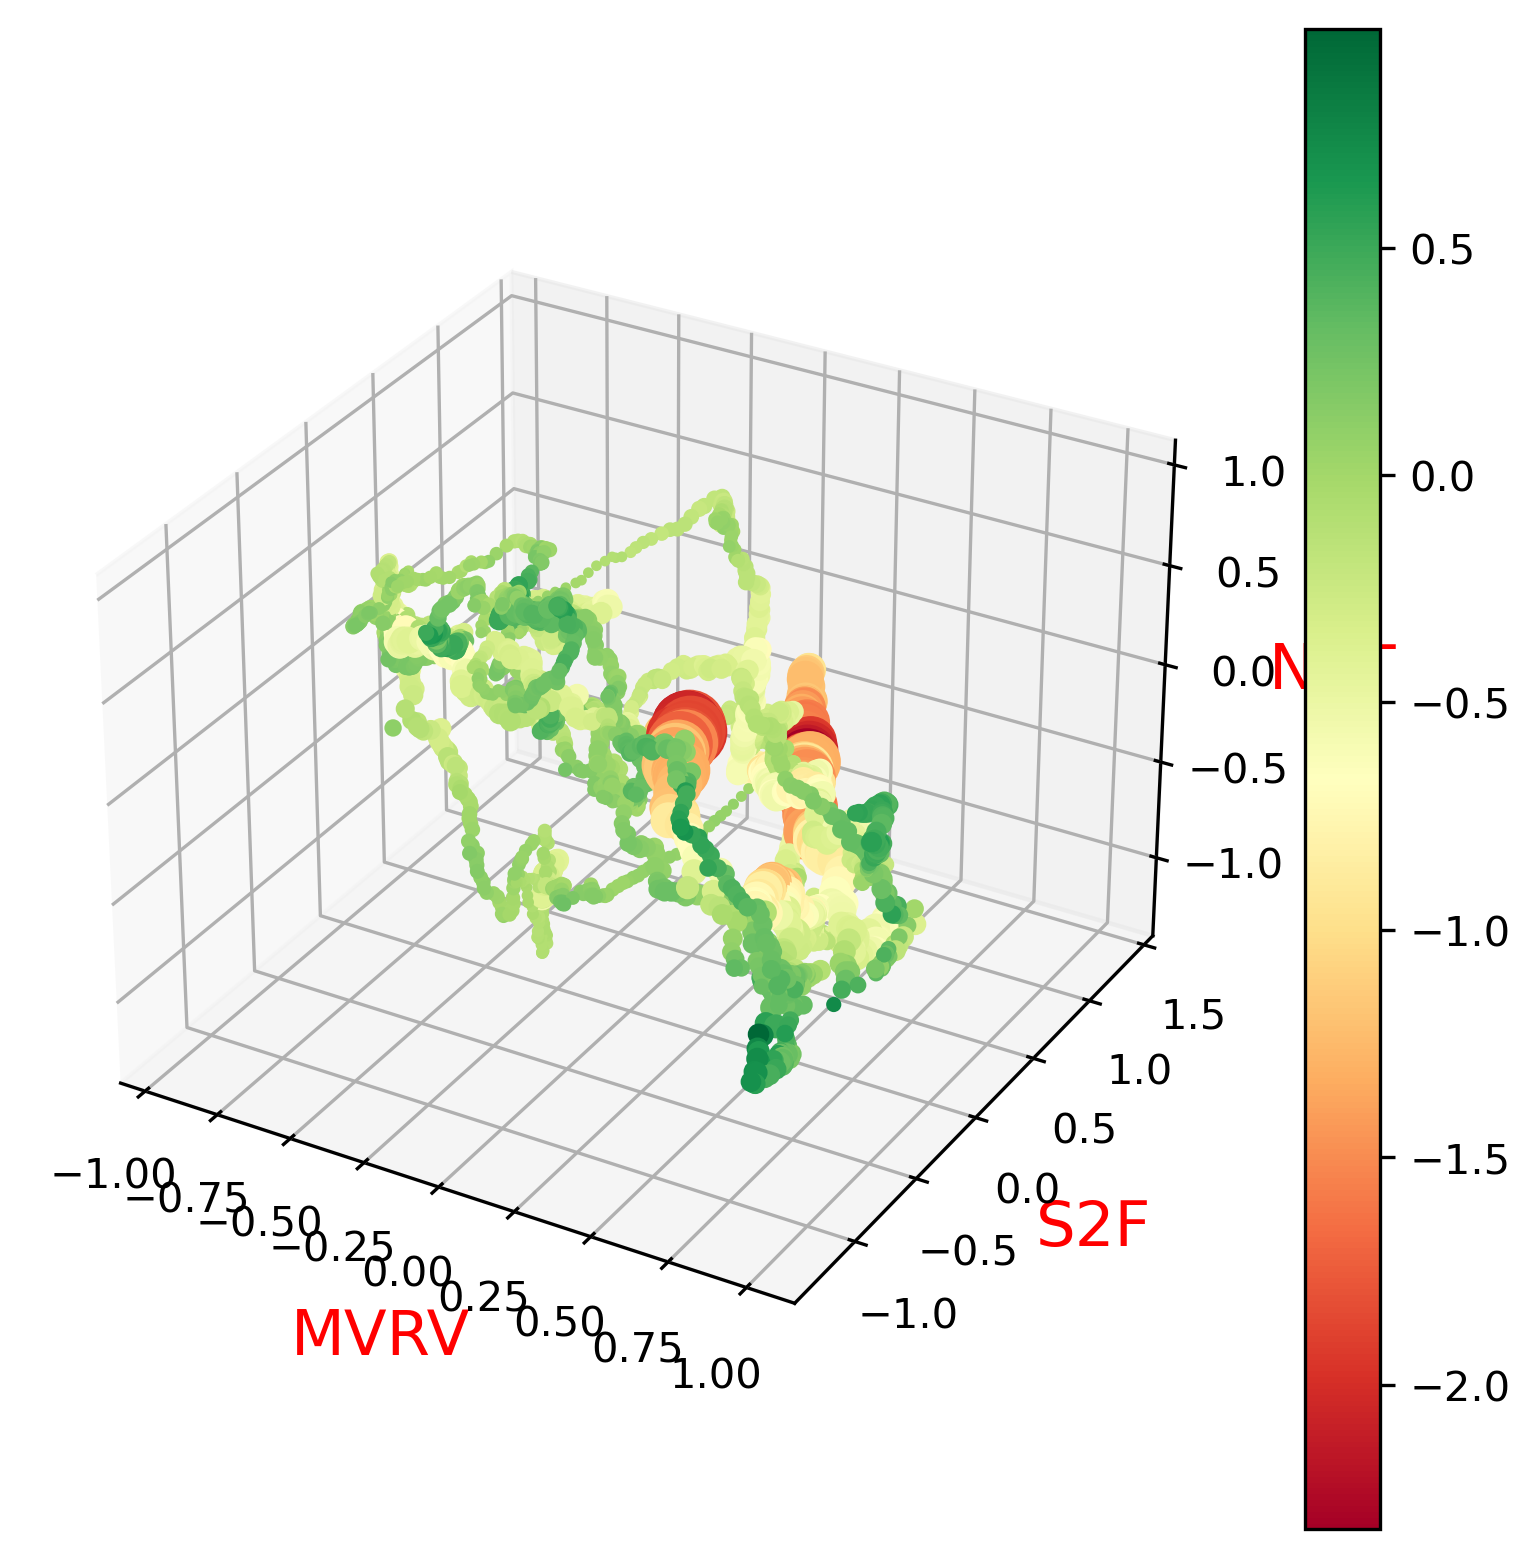

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

all_2_array = np.array(all_2)
x = all_2_array[:,0]  # MVRV
y = all_2_array[:,1]  # S2F
z = all_2_array[:,2]  # NVT
 
 
# 绘制散点图
fig = plt.figure(figsize=(5,5),dpi=300,facecolor='white')
ax = Axes3D(fig)
ax_plot= ax.scatter(x, y, z,alpha=1,s=all_2['std/price']*100,c=-all_2['price_increase_2'],cmap=plt.get_cmap('RdYlGn'))
 
 
# 添加坐标轴(顺序是Z, Y, X)
ax.set_zlabel('NVT', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('S2F', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('MVRV', fontdict={'size': 15, 'color': 'red'})
fig.colorbar(ax_plot,ax=ax)
plt.show()

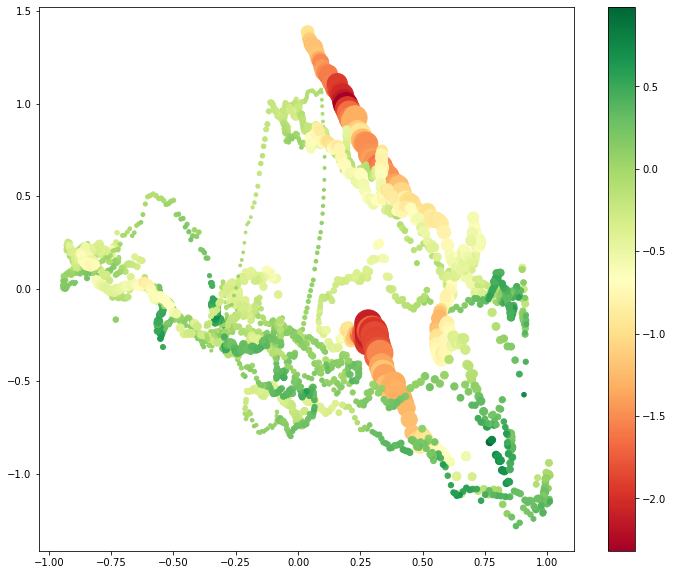

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

all_2_array = np.array(all_2)
x = all_2_array[:,0]  # MVRV
y = all_2_array[:,1]  # S2F

 
 
# 绘制散点图

fig,ax = plt.subplots(figsize=(12,10))
ax_plot = ax.scatter(x, y,alpha=1,s=all_2['std/price']*300,c=-all_2['price_increase_2'],cmap=plt.get_cmap('RdYlGn')) 

fig.colorbar(ax_plot,ax=ax)
plt.show()

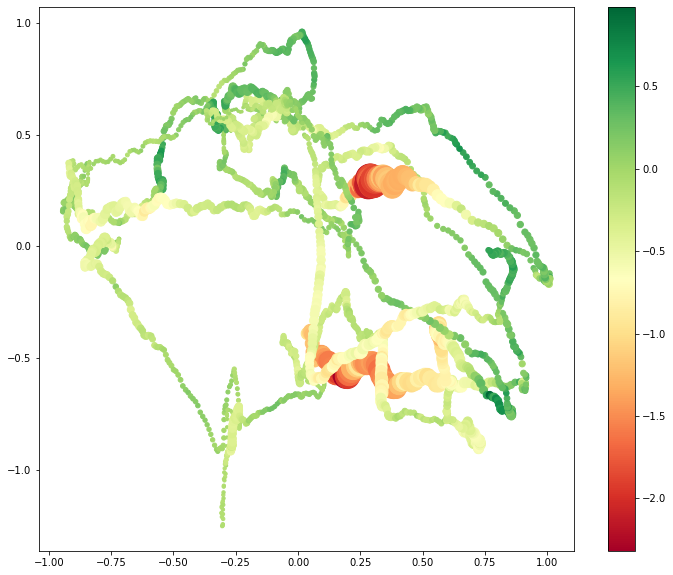

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

all_2_array = np.array(all_2)
x = all_2_array[:,0]  # MVRV
y = all_2_array[:,2]  # NVT

 
 
# 绘制散点图

fig,ax = plt.subplots(figsize=(12,10))
ax_plot = ax.scatter(x, y,alpha=1,s=all_2['std/price']*300,c=-all_2['price_increase_2'],cmap=plt.get_cmap('RdYlGn')) 

fig.colorbar(ax_plot,ax=ax)
plt.show()

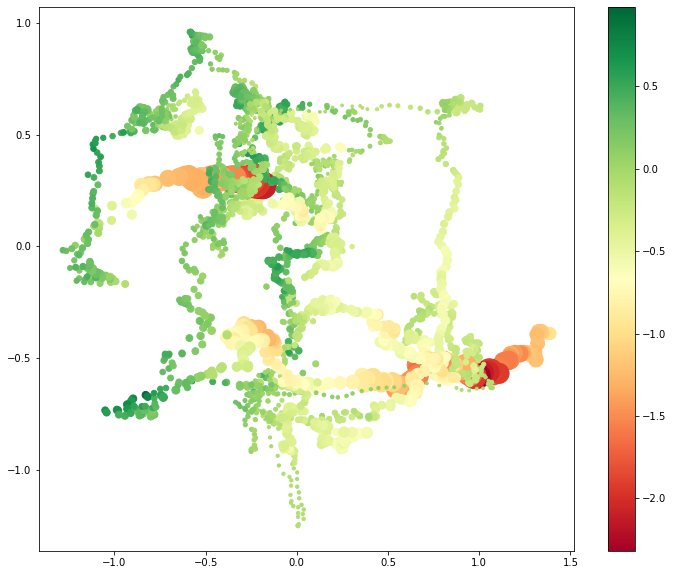

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

all_2_array = np.array(all_2)
x = all_2_array[:,1]  # S2F
y = all_2_array[:,2]  # NVT

 
 
# 绘制散点图

fig,ax = plt.subplots(figsize=(12,10))
ax_plot = ax.scatter(x, y,alpha=1,s=all_2['std/price']*300,c=-all_2['price_increase_2'],cmap=plt.get_cmap('RdYlGn')) 

fig.colorbar(ax_plot,ax=ax)
plt.show()